<a href="https://colab.research.google.com/github/opticalcode/deeplearning2/blob/master/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8B_Deep_Learning2_%E7%AC%AC2%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2章
* 自然言語と単語の分散表現

2.１ 自然言語処理とは
* 自然言語処理とは、「私たちの言葉をコンピューターに理解させるための技術」

2.1.1 単語の意味
* 自然言語をコンピュータに理解させるためには、「単語の意味」を理解させることが重要。
* 単語の意味を捉えた３つの手法を見ていく。
* ソシーラスによる手法
* カウントベースによる手法
* 推論ベースの手法（word 2vec)

2.2 ソシーラス
* ソシーラスとは類似辞書
* 「同じ意味の単語（同義語）」や「意味の似た単語（類義語）」が同じグループに分類されている。

2.2.1 WordNet
* WordNetはプリンストン大学で、1985年に開発がスタートした伝統のあるソシーラス。

2.2.2 ソシーラスの問題点
* 時代の変化に対応するのが困難
* 人の作業コストが高い
* 単語の細やかなニュアンスが表現できない
* このような問題を避けるために、「カウントベース手法」とニューラルネットワークを使った「推論ベースの手法」がある。

2.3 カウントベースの手法
* カウントベースの手法に進むにあたって、コーパスを使用する。
* コーパスとは、自然言語処理の研究やアプリケーションの目的を持って収集されたテキストデータ。
* カウントベースの手法の目標は、そのような人の知識が詰まったコーパスから、自動的に、効率てよく、そのエッセンスを抽出すること。

2.3.1 Pythonによるコーパスの下準備


In [0]:
text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

In [0]:
words = text.split(' ')
words 

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [0]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

id_to_word        

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [0]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [0]:
id_to_word[1]

'say'

In [0]:
word_to_id['hello']

5

In [0]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [0]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.',' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word    

In [0]:
text = 'You say goodby and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

2.3.2 単語の分散表現
* 分散表現とは「単語の意味」を的確に捉えたベクトル表現。

2.3.3 分布仮説
* 「単語の意味は、周囲の単語によって形成される」

2.3.4 共起行列

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

[0 1 2 3 4 1 5 6]


In [0]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [0]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
], dtype=np.int32)

In [0]:
print(C[0])

[0 1 0 0 0 0 0]


In [0]:
print(C[4])

[0 1 0 1 0 0 0]


In [0]:
print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]


In [0]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co.matrix = np.zeros((vocab_size, vocab_size), dtype=no.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx <= corpus_size:
                right_word_id = corpus[right_idx]
                co.matrix[word_id, right_word_id] += 1

    return co_matrix                   

2.3.5 ベクトル間の類似度
* 単語のベクトル表現の類似度に関しては、コサイン類似度がよく用いられる。

In [0]:
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2))
    ny = y / np.sqrt(np.sum(y**2))
    return np.dot(nx, ny)

In [0]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye adn I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


2.3.6 類似単語のランキング表示

In [0]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    #❶クエリを取り出す
    if query not in word_to_id:
       print('%s is not found' % query)
       return

    print('\n[query' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    #❷コサイン類似度の算出
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    #❸コサイン類似度の結果から、その値を高い順に出力
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue

        print(' %s: %s' % (id_to_word[i], cos_similarity[i]))

        count += 1
        if count >= top:
            return          

In [0]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

In [0]:
(-x).argsort()

array([0, 2, 1])

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you',word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


* 「you」という単語をクエリに対して類似語を上位から5つ、コサイン類似度で表示した。
* 「you」に近い単語は「i」、「goodbye」、「hello」という結果になった。
* 「you」と「i」はお互い人称代名詞で近いと取れるが、「goodbye」「hello」はまだ私の感覚とはズレがある。
* これは、コーパスのサイズが極端に小さいことが原因である。

2.4 カウントベースの手法の改善
* 単語の共起ベクトルを作り、単語ベクトルで表示することに成功した。
* しかし、まだ改善すべきところがある。

2.4.1 相互情報量

In [0]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range (C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
              cnt += 1
              if cnt % (total//100) == 0:
                  print('%.1f%% done' % (100*cnt/total))

    return M                  

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch02')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


2.4.2 次元削減
*　重要な情報を残してベクトルの次元を削減する。
* 特異値分解を使った次元削減を行う。

2.4.3 SVDによる次元削減

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch02')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print(C[0])

[0 1 0 0 0 0 0]


In [0]:
print(W[0])

[0.    1.807 0.    0.    0.    0.    0.   ]


In [0]:
print(U[0])

[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


In [0]:
print(U[0, :2])

[0.341 0.   ]


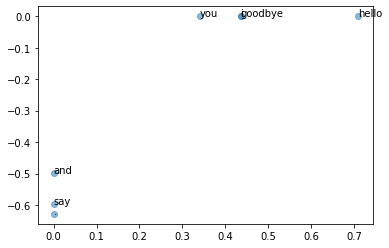

In [0]:
for word, word_to_id in word_to_id.items():
    plt.annotate(word, (U[word_to_id, 0], U[word_to_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()    

2.4.4 PTBデータセット

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch02')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word to_id['happy]:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word to_id['happy]: 4428
word_to_id['lexus']: 7426


2.4.5 PTBデータセットでの評価

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch02')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('counting co-occurrence...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculating PPMI...')
W = ppmi(C, verbose=True)

print('calculating SVD...')
try:
    # truncated SVD (fast!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
    
except ImportError:
    # SVD (slow)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

counting co-occurrence...
calculating PPMI...
1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0% 

2.5 まとめ
* 「単語の意味」をコンピュータに理解させる事をテーマに学びました。